In [1]:
from IPython.display import Markdown as md
import warnings
import numpy as np
import sympy as sp
import control as ctrl               
import math
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({
                     'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'});

In [2]:
# Gráficos do Lugar das Raízes da função de transferência G(z) amostrada em 0,1 s, 0,5 s, 1 s e 2 s:

wa = [];
wn = [];
damping_ratio = [];
Gz = [];
Gd = [];
FTMF_2 = [];
polos = [];
T = [0.1, 0.5, 1, 2];
Gs = ctrl.tf(1,[1,1]);

for i in range(len(T)):
    Gd.append(ctrl.tf([1, 0],[1, -1],T[i]));
    Gz.append(ctrl.minreal(ctrl.c2d(Gs,T[i])*Gd[-1], verbose=False));
    wa.append(2*np.pi/T[i]);
                     
for tf in Gz:
    warnings.filterwarnings('ignore');
    FTMF_2.append(ctrl.feedback(2*tf,1));
    wn.append(ctrl.damp(FTMF_2[-1], doprint=False)[0]);
    damping_ratio.append(ctrl.damp(FTMF_2[-1], doprint=False)[1]);
    polos.append(ctrl.pole(FTMF_2[-1]));      # Cálculo dos pólos dos sistemas com ganho igual a 2.

wn = np.array(list(list(zip(*wn))[0]));
damping_ratio = np.array(list(list(zip(*damping_ratio))[0]));
wd = (wn*np.sqrt(1-damping_ratio**2));
Mpc = 100*np.exp(-(np.pi*damping_ratio)/np.sqrt(1-damping_ratio**2));
tsc = 3/(damping_ratio*wn);
p1, p2 = zip(*polos);
        
fig = plt.figure();
for i in range(len(Gz)):
    ax = fig.add_subplot(2, 2, i+1);
    ctrl.rlocus(Gz[i]);
    ax.plot(np.real(p1[i]), np.imag(p1[i]), 'm*', markersize=10); # Pólos do sistema com ganho igual a 2 em magenta.
    ax.plot(np.real(p2[i]), np.imag(p2[i]), 'm*', markersize=10);
    ax.set_title("Lugar das Raízes com T = " + str(T[i]) + ' s');
    ax.set_xlabel("$Real$");
    ax.set_ylabel("$Imag$");
    ax.set_xlim([-2, 2]);
    
plt.tight_layout();
plt.show();

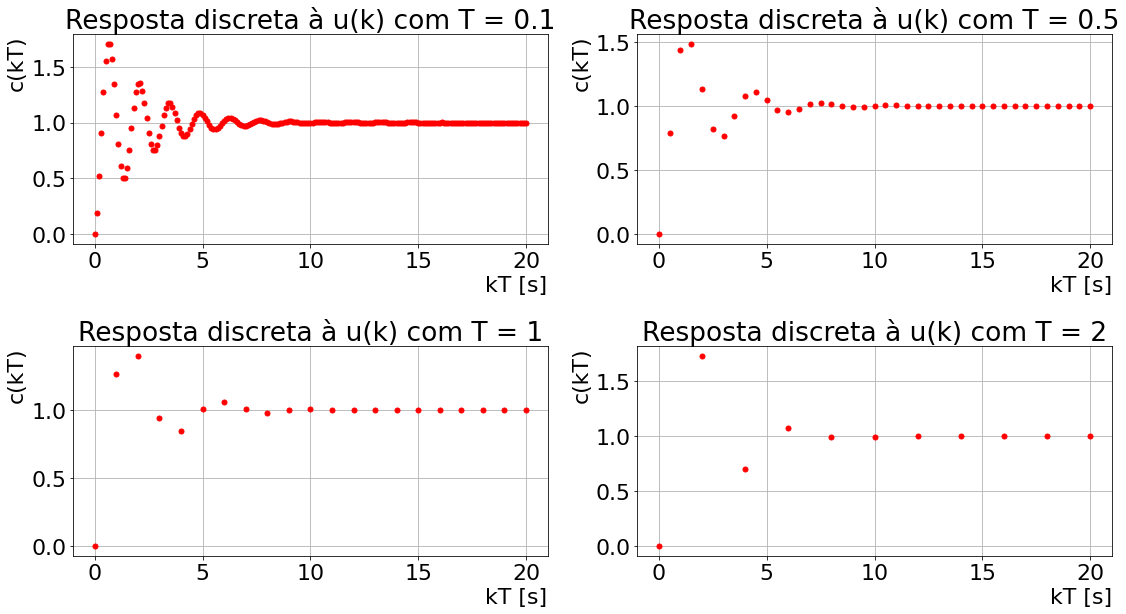

In [3]:
k = [];
ck = [];
tfinal = 20;

fig = plt.figure();
for i in range(len(T)):
    Kmax = int(tfinal/T[i]+1);
    kT = np.linspace(0, tfinal, Kmax);
    ckT = ctrl.step_response(FTMF_2[i], kT)[1];
    k.append(kT.copy());
    ck.append(ckT.copy());
    
    ax = fig.add_subplot(2, 2, i+1);
    ax.plot(kT, ckT, 'ro', markersize=5);
    ax.set_title("Resposta discreta à u(k) com T = " + str(T[i]));
    ax.set_xlabel("kT [s]");
    ax.set_ylabel("c(kT)");
    ax.grid();

plt.tight_layout();
plt.show();

In [4]:
# Sobressinal percentual
Mp = [None]*4;
sobressinal = lambda x : (max(x)-x[-1])/(x[-1]-x[0])*100;

for i in range(4):
    # Sobressinal percentual das respostas discretas:
    print("Sobressinal percentual da resposta discreta de T = " + str(T[i]) + "s:");
    Mp[i] = sobressinal(ck[i]);
    print("\tMp = \n\t", Mp[i], '%\n');

Sobressinal percentual da resposta discreta de T = 0.1s:
	Mp = 
	 70.49798845252585 %

Sobressinal percentual da resposta discreta de T = 0.5s:
	Mp = 
	 48.31462151110539 %

Sobressinal percentual da resposta discreta de T = 1s:
	Mp = 
	 39.52889146553427 %

Sobressinal percentual da resposta discreta de T = 2s:
	Mp = 
	 72.94124163456314 %



In [5]:
# Tempo de acomodação para 5%
ts = [None]*4;

delta = lambda x: abs((x[-1]-x)/x[-1]);
absolute_difference = lambda x, idx, percentage: abs(x[idx]-x[-1]-percentage*x[-1]);
    
# Tempo de acomodação de 5% para as respostas discretas:
for i in range(4):
    idx = np.argwhere(delta(ck[i]) > 0.05)[-1][0];
    if absolute_difference(ck[i],idx,0.05) < absolute_difference(ck[i],idx+1,0.05):
        ts[i] = k[i][idx];
    else:
        ts[i] = k[i][idx+1];
    
    print("Tempo de acomodação para 5% da resposta discreta de T = " + str(T[i]) + "s:");
    print("\tTs (5%) = \n\t", np.around(ts[i], 2), 's\n');

Tempo de acomodação para 5% da resposta discreta de T = 0.1s:
	Ts (5%) = 
	 5.8 s

Tempo de acomodação para 5% da resposta discreta de T = 0.5s:
	Ts (5%) = 
	 6.5 s

Tempo de acomodação para 5% da resposta discreta de T = 1s:
	Ts (5%) = 
	 6.0 s

Tempo de acomodação para 5% da resposta discreta de T = 2s:
	Ts (5%) = 
	 6.0 s



In [6]:
# Tabela com os fatores de amortecimento, frequências naturais, sobressinais, tempos de acomodação para 5%, e
# número de amostras por ciclo das oscilações senoidais amortecidas:

tabela = [x for y in zip(damping_ratio, wn, Mpc, Mp, tsc, ts, wa/wd) for x in y];

md("""
<style>
.rendered_html table, .rendered_html td, .rendered_html th {{
    font-size: 120%;
table th:first-of-type {{
    width: 10%;
}}
table th:nth-of-type(2) {{
    width: 10%;
}}
table th:nth-of-type(3) {{
    width: 10%;
}}
table th:nth-of-type(4) {{
    width: 14%;
}}
table th:nth-of-type(5) {{
    width: 2%;
}}
table th:nth-of-type(6) {{
    width: 14%;
}}
table th:nth-of-type(7) {{
    width: 14%;
}}
table th:nth-of-type(8) {{
    width: 2%;
}}
table th:nth-of-type(9) {{
    width: 14%;
}}
table th:nth-of-type(10) {{
    width: 10%;
}}}}
</style>

| $\mathrm{{T}}$ | $\mathrm{{\zeta}}$ | $\mathrm{{\omega_n}}$ || $\mathrm{{M_{{p\%}}}}$    ||| $\mathrm{{T_{{s_{{5\%}}}}}}$ || $\mathrm{{\\frac{{\omega_a}}{{\omega_d}}}}$ |
|:--------------:|:------------------:|:---------------------:|:-------------:||:----------:|:-------------:||:-------------:|:-------------------------------------------:|
|                |                    |                       | **Calculado** || **Python** | **Calculado** || **Python**    |                                             |
| **0,1 s**      | {:f}               | {:f}                  | {:f}          || {:f}       | {:f}          || {:f}          | {:f}                                        |
| **0,5 s**      | {:f}               | {:f}                  | {:f}          || {:f}       | {:f}          || {:f}          | {:f}                                        |
| **1 s**        | {:f}               | {:f}                  | {:f}          || {:f}       | {:f}          || {:f}          | {:f}                                        |
| **2 s**        | {:f}               | {:f}                  | {:f}          || {:f}       | {:f}          || {:f}          | {:f}                                        |
""".format(*tabela))


<style>
.rendered_html table, .rendered_html td, .rendered_html th {
    font-size: 120%;
table th:first-of-type {
    width: 10%;
}
table th:nth-of-type(2) {
    width: 10%;
}
table th:nth-of-type(3) {
    width: 10%;
}
table th:nth-of-type(4) {
    width: 14%;
}
table th:nth-of-type(5) {
    width: 2%;
}
table th:nth-of-type(6) {
    width: 14%;
}
table th:nth-of-type(7) {
    width: 14%;
}
table th:nth-of-type(8) {
    width: 2%;
}
table th:nth-of-type(9) {
    width: 14%;
}
table th:nth-of-type(10) {
    width: 10%;
}}
</style>

| $\mathrm{T}$ | $\mathrm{\zeta}$ | $\mathrm{\omega_n}$ || $\mathrm{M_{p\%}}$    ||| $\mathrm{T_{s_{5\%}}}$ || $\mathrm{\frac{\omega_a}{\omega_d}}$ |
|:--------------:|:------------------:|:---------------------:|:-------------:||:----------:|:-------------:||:-------------:|:-------------------------------------------:|
|                |                    |                       | **Calculado** || **Python** | **Calculado** || **Python**    |                                             |
| **0,1 s**      | 0.110858               | 4.510262                  | 70.438398          || 70.497988       | 6.000000          || 5.800000          | 14.017266                                        |
| **0,5 s**      | 0.238784               | 2.093941                  | 46.185262          || 48.314622       | 6.000000          || 6.500000          | 6.180076                                        |
| **1 s**        | 0.319049               | 1.567159                  | 34.729091          || 39.528891       | 6.000000          || 6.000000          | 4.230370                                        |
| **2 s**        | 0.370064               | 1.351119                  | 28.609446          || 72.941242       | 6.000000          || 6.000000          | 2.502867                                        |
